In [1]:
import os

In [2]:
data_dir ="/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/cell_images"

In [3]:
os.listdir(data_dir)

['train', 'test']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread

In [6]:
train_path = data_dir + "/train/"

In [7]:
test_path = data_dir + "/test/"

In [8]:
test_path

'/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/cell_images/test/'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path + "/parasitized")[0]

'C99P60ThinF_IMG_20150918_141620_cell_28.png'

In [11]:
imread(train_path + "/parasitized/" + os.listdir(train_path + "/parasitized")[0]).shape

(142, 148, 3)

In [12]:
parasitized_cell =train_path + "/parasitized/" + os.listdir(train_path + "/parasitized")[0]

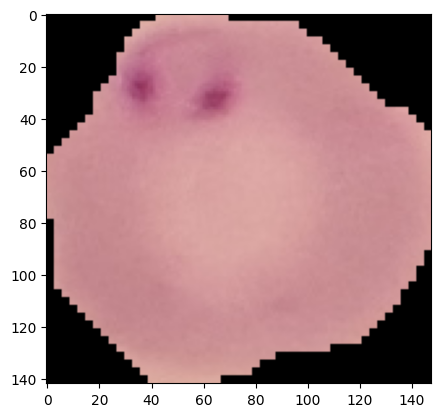

In [13]:
plt.imshow(imread(parasitized_cell))

In [14]:
uninfected_cell =train_path + "/uninfected/" + os.listdir(train_path + "/uninfected")[0]

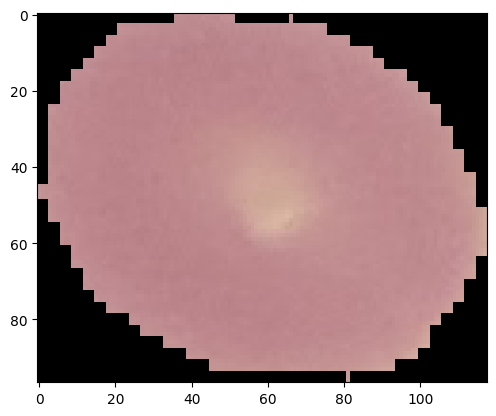

In [15]:
plt.imshow(imread(uninfected_cell))

In [16]:
imread(uninfected_cell).shape

(97, 118, 3)

In [17]:
# pwd

In [18]:
len(os.listdir(train_path + "/parasitized"))

12480

In [19]:
len(os.listdir(train_path + "/uninfected"))

12480

In [20]:
len(os.listdir(test_path + "/parasitized"))

1300

In [21]:
len(os.listdir(test_path + "/uninfected"))

1300

In [22]:
dim1 =[]
dim2 =[]

for image_filename in os.listdir(test_path + "/uninfected"):
  img = imread(test_path + "/uninfected/" +image_filename)
  img.shape[:2]
  dim1.append(img.shape[0])
  dim2.append(img.shape[1])





Text(37.722222222222214, 0.5, 'Width')

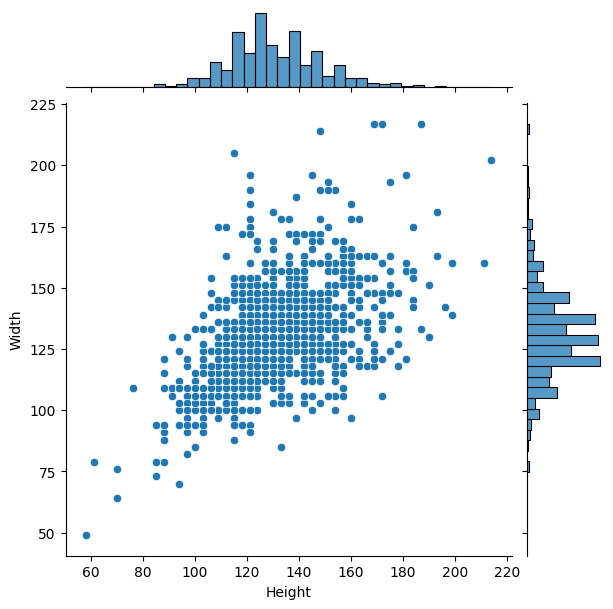

In [23]:
# dim1

sns.jointplot(x=dim1,y=dim2)
plt.xlabel("Height")
plt.ylabel("Width")

In [24]:
np.mean(dim1)

np.float64(130.92538461538462)

In [25]:
np.mean(dim2)

np.float64(130.75)

In [26]:
image_shape = (130,130,3)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
image_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             rescale=1/255,
                             horizontal_flip=True,
                             fill_mode="nearest")

In [29]:
# imread(parasitized_cell).min()

In [30]:
imread(uninfected_cell).max()   #already normalized

np.float32(0.8627451)

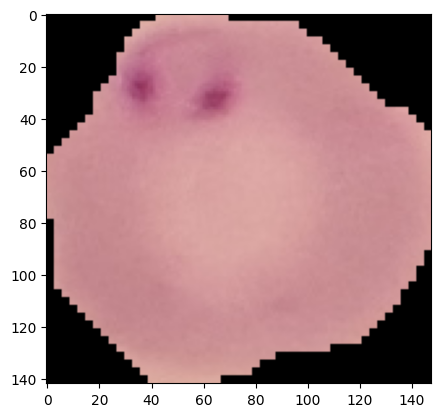

In [31]:
para_img =imread(parasitized_cell)
plt.imshow(para_img)

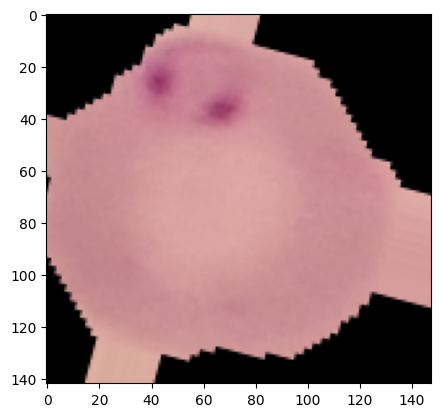

In [32]:
plt.imshow(image_gen.random_transform(para_img))

In [33]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [34]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


#model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout, Flatten, Dense, Conv2D, MaxPooling2D,InputLayer


In [36]:
model=Sequential()

# Correct way to specify input shape for a Sequential model
model.add(InputLayer(shape=image_shape))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))


model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop= EarlyStopping(monitor="val_loss",patience=2)

In [40]:
batch_size =16


In [41]:
image_shape[:2]

(130, 130)

In [42]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [43]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [44]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False)


Found 2600 images belonging to 2 classes.


In [45]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [46]:
results = model.fit(train_image_gen,epochs=1,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 5193s 3s/step - accuracy: 0.5366 - loss: 3.2353 - val_accuracy: 0.5731 - val_loss: 0.6839


In [65]:
# results.history.history

In [66]:
results.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [71]:
met=pd.DataFrame(model.history.history)

In [73]:
met

,accuracy,loss,val_accuracy,val_loss
0,0.542311,1.069305,0.573077,0.683948


In [69]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.6072 - loss: 0.6661


[0.6833667755126953, 0.5603846311569214]

In [ ]:
# from tensorflow.keras.preprocessing import image

In [74]:
model.save('malaria_detector.keras')

In [122]:
from tensorflow.keras.models import load_model

model =load_model('malaria_detector.keras')

In [123]:
pred = n.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step


In [124]:
predictions =pred > 0.5

In [125]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [127]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.57      0.64      0.61      1300
           1       0.59      0.53      0.56      1300

    accuracy                           0.58      2600
   macro avg       0.58      0.58      0.58      2600
weighted avg       0.58      0.58      0.58      2600



In [128]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[831 469]
 [615 685]]


In [129]:
#predict new case

In [130]:
from tensorflow.keras.preprocessing import image

In [131]:
parasitized_cell

'/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/cell_images/train//parasitized/C99P60ThinF_IMG_20150918_141620_cell_28.png'

In [133]:
my_image = image.load_img(parasitized_cell,target_size=image_shape)

In [142]:
my_image = image.load_img(uninfected_cell,target_size=image_shape)

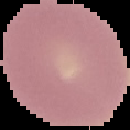

In [143]:
my_image

In [144]:
my_img_arr=image.img_to_array(my_image)

In [145]:
my_img_arr.shape

(130, 130, 3)

In [146]:
my_img_arr =np.expand_dims(my_img_arr,axis=0)

In [147]:
my_img_arr.shape

(1, 130, 130, 3)

In [148]:
result =model.predict(my_img_arr)

if result > 0.5:
  print("Parasitized")
else:
  print("Uninfected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Parasitized
